# Ford GoBike Data Exploration 
## by Moustafa Moubarak

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.</br>

## Data Assessing

In [2]:
df_ford = pd.read_csv("201902-fordgobike-tripdata.csv")
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df_ford.shape

(183412, 16)

In [4]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df_ford["start_time"].dtypes

dtype('O')

> All ID column Data Type is made to be a float and needs to be changed to `str`</br>
> `start_time` & `end_time` needs to be changed to Date Time Objects so we can perform date time operations on them 

In [6]:
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> There are Missing Data in these Columns :
>- `start_station_id`
>- `start_station_name`
>- `end_station_id`
>- `end_station_name`
>- `member_birth_year` 
>- `member_gender`

In [7]:
df_ford.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
df_ford.member_gender.value_counts()


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
df_ford.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

## Data Cleaning

> Creating a Copy of the cleaned Data Frame 

In [10]:
df_clean = df_ford.copy()

### 1-Dropping All NAN Values

In [11]:
df_clean.dropna(inplace = True)

> Validating the Data nan values are dropped

In [12]:
df_clean.isnull().sum().sum()

0

### 2-Changing Data Types 

In [13]:
faulty_dt = ["start_station_id","end_station_id","bike_id"]

for x in faulty_dt:
    df_clean[x] = df_clean[x].astype('str');
    
df_clean.member_birth_year = df_clean.member_birth_year.astype('int')

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

> Validating Data Type changes has worked

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### 3-Will Extract from `start_time` & `duration_sec` 5 other columns to make the data more insightful
- Change `duration_sec` to minuits in a column named **`duration_min`**
- Creating **`start_date`** from `start_time`
- Creating **`start_month`** from `start_time`
- Creating **`start_day_of_week`** from `start_time`
- Creating **`start_hour_of_day`** from `start_time`

> Changing Duration to Min

In [15]:
df_clean['duration_min'] = df_clean.duration_sec /60

> Validating The Change

In [16]:
df_clean.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
39202,356,2019-02-23 10:05:48.540,2019-02-23 10:11:44.995,245.0,Downtown Berkeley BART,37.870139,-122.268422,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,6409,Subscriber,1989,Male,No,5.933333


> Will extract the four new columns from `start_time` as explained above

In [17]:
df_clean['start_date'] = df_clean.start_time.dt.strftime('%d-%m-%Y')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')

> Validating the Change

In [18]:
df_clean.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_month,start_day_of_week,start_hour_of_day
143765,753,2019-02-07 14:15:25.694,2019-02-07 14:27:59.495,181.0,Grand Ave at Webster St,37.811377,-122.265192,222.0,10th Ave at E 15th St,37.792714,...,4703,Subscriber,1993,Male,No,12.55,07-02-2019,February,Thursday,14


### 4-Will calculate the current Age `(2021-member_birth_year)`

In [19]:
df_clean["age"] = 2021 - df_clean['member_birth_year']

In [20]:
df_clean.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_month,start_day_of_week,start_hour_of_day,age
130230,1628,2019-02-09 18:12:00.435,2019-02-09 18:39:08.482,50.0,2nd St at Townsend St,37.780526,-122.390288,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,...,Customer,1995,Male,No,27.133333,09-02-2019,February,Saturday,18,26


In [21]:
df_clean["age"].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

> The maximum age obtained 143 which is not logical 

#### Let us Explore The Data Visually and see the age limit that won't affect the analysis of Rides count

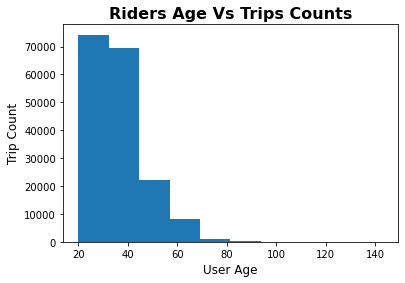

In [22]:
plt.hist(df_clean['age']);
plt.title('Riders Age vs Trips Counts'.title(), fontsize= 16, weight = 'bold');
plt.ylabel('Trip Count', fontsize= 12);
plt.xlabel('User Age', fontsize= 12);

In [23]:
df_clean.shape

(174952, 22)

> It seems like people at age greater than 80 is very minimal and therfore will filter them out from my dataset

In [24]:
df_clean = df_clean.query('age <= 80')

In [25]:
df_clean.shape

(174749, 22)

> Seems great we have filtered out 203 `(174952-174749)` Entery greater than 80 

In [26]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,age
count,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000
mean,704.300563,37.771201,-122.351718,37.771397,-122.351294,1984.877665,11.738343,36.122335
std,1643.075498,0.100445,0.117778,0.100349,0.117340,9.871342,27.384592,9.871342
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1941.000000,1.016667,20.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,29.000000
50%,511.000000,37.780787,-122.398279,37.781010,-122.397437,1987.000000,8.516667,34.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.285633,1992.000000,13.150000,41.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,80.000000


### What is the structure of your dataset?
#### Columns am interested in are 
>- user_type
>- member_gender
>- age
>- start_day_of_week
>- start_month
>- start_hour_of_day
>- duration_min
   
### What is/are the main feature(s) of interest in your dataset?

- To see how different variables affect the Trip counts and duration of the Trips made with bikes

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The Field of duration, dates and user account data, specifically the columns I mentioned in the Data first question.

## Univariate Exploration

> Creating A Function to create Histograms to avoid repetition

In [27]:
def hist_chart(df,col):
    """
    this function is for drawing a histgram chart to reduce repetitive code.
    """
    order1 = df[col].value_counts().sort_index().index
    base_color = sb.color_palette()[0]
    plt.rcParams['figure.figsize'] = 10, 8
    
    
    sb.countplot(data = df, x = col, color = base_color, order = order1);
    plt.xlabel(f'{col}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel('Count', fontsize= 12, weight = 'bold');

### Trip Distribution per month

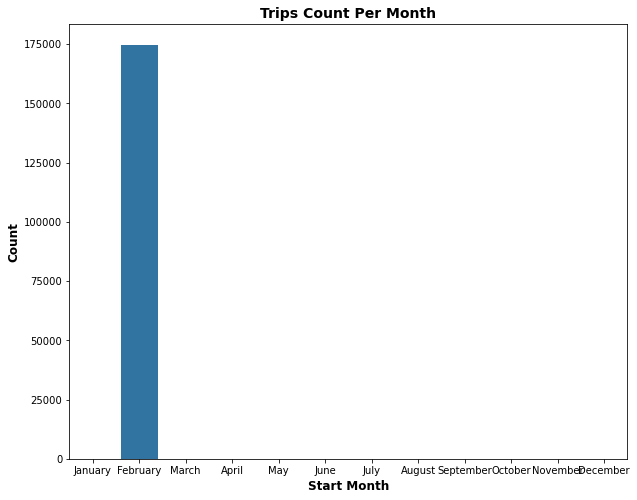

In [28]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_clean['start_month'] = df_clean['start_month'].astype(monthcat)

hist_chart(df_clean,'start_month')
plt.title('trips count per month'.title(), fontsize= 14, weight = 'bold');

> I didn't know that I have the data for february Only it seems like the column I created for the Month wasn't meaningful

### Trip distribution over days of the week

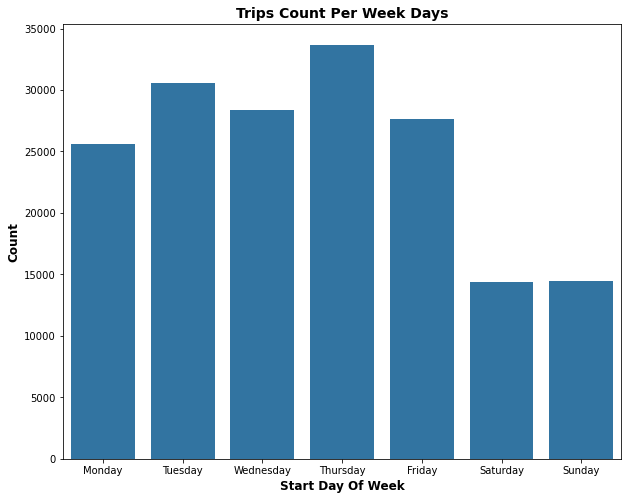

In [29]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_day_of_week'] = df_clean['start_day_of_week'].astype(weekdaycat)

hist_chart(df_clean,'start_day_of_week')
plt.title('trips count per Week days'.title(), fontsize= 14, weight = 'bold');

> Seems Like the Usage of Bikes in weekends is lower than the usage of Bikes in working days

### Trip distribution over day hours

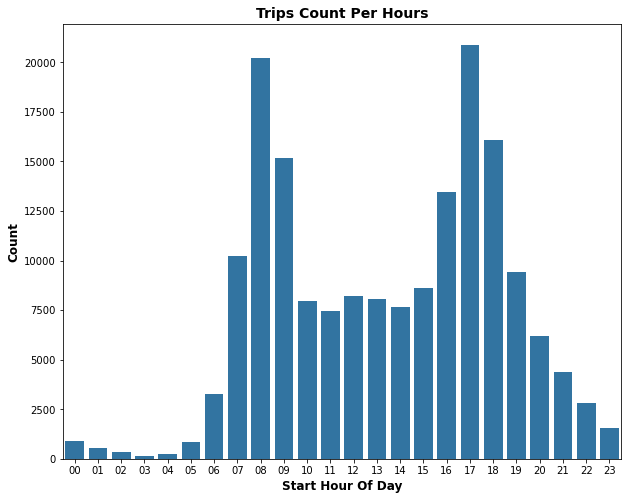

In [30]:
hist_chart(df_clean,'start_hour_of_day')
plt.title('trips count per hours'.title(), fontsize= 14, weight = 'bold');

> This is actually Logical, where the peak usage of bikes is around (7-9)AM and (4-6)PM and it's logical because people mainly use their bike in working days and these timings is where people start and end their working hours

### Trip duration Count

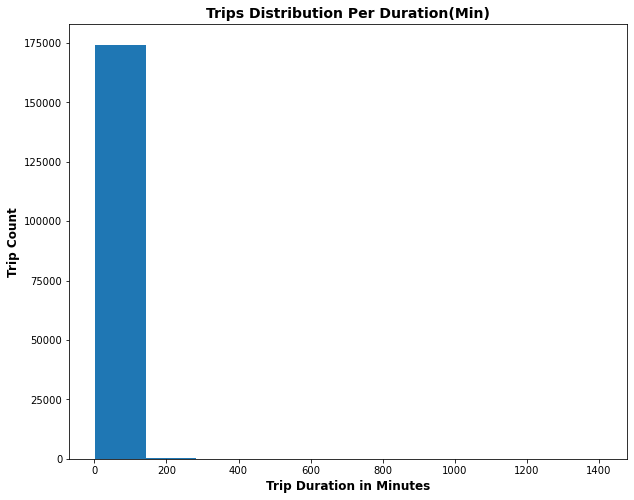

In [31]:
plt.hist(data=df_clean, x='duration_min');
plt.xlabel('Trip Duration in Minutes', fontsize= 12, weight = 'bold');
plt.ylabel('Trip Count', fontsize= 12, weight = 'bold');
plt.title('trips distribution per duration(Min)'.title(), fontsize= 14, weight = 'bold');

>It seems Like almost all the trips made are less than 200 min

In [32]:
df_clean.duration_min.describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

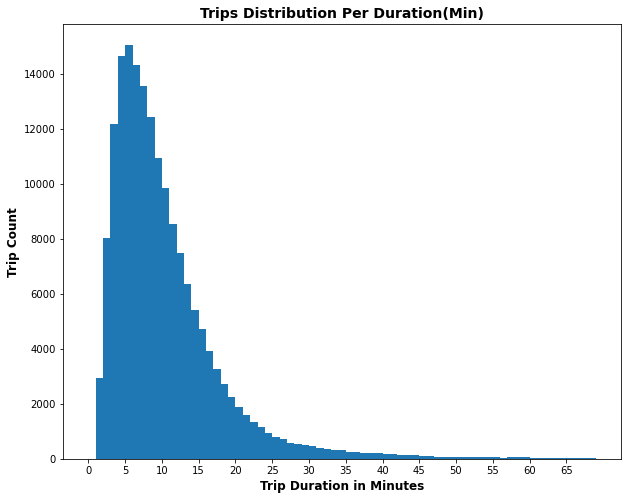

In [33]:
bin = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
plt.hist(data=df_clean, x='duration_min', bins=bin);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minutes', fontsize= 12, weight = 'bold');
plt.ylabel('Trip Count', fontsize= 12, weight = 'bold');
plt.title('trips distribution per duration(Min)'.title(), fontsize= 14, weight = 'bold');

> Most of the Trip is less than 50 Min

### Gender Count

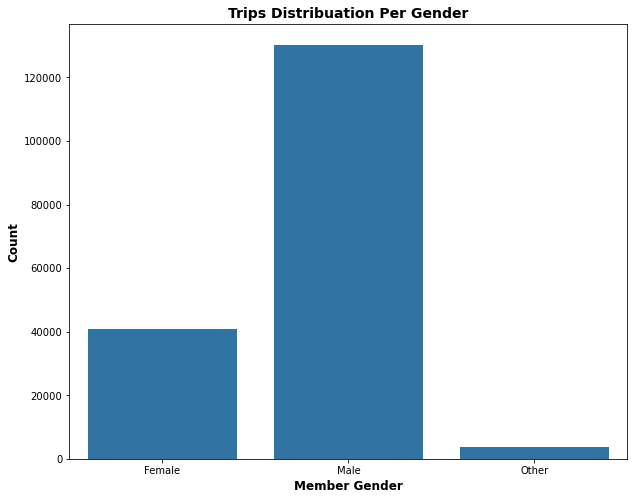

In [34]:
hist_chart(df_clean,'member_gender')
plt.title('trips distribuation per gender'.title(), fontsize= 14, weight = 'bold');

> Most of the Riders are Males

### Riders Age Count

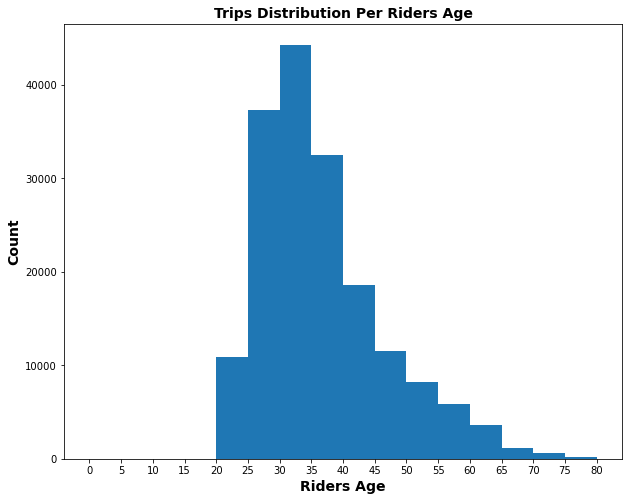

In [35]:
bins = np.arange(0, df_clean['age'].max()+5, 5)
plt.hist(data=df_clean, x='age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Riders Age', fontsize= 14, weight = 'bold');
plt.ylabel('Count', fontsize= 14, weight = 'bold');
plt.title('trips distribution per Riders age'.title(), fontsize= 14, weight = 'bold');

> Age Range of 25 till 50 is the Bulck usage and the Peak appears to be at the age of 35

### User Type Count

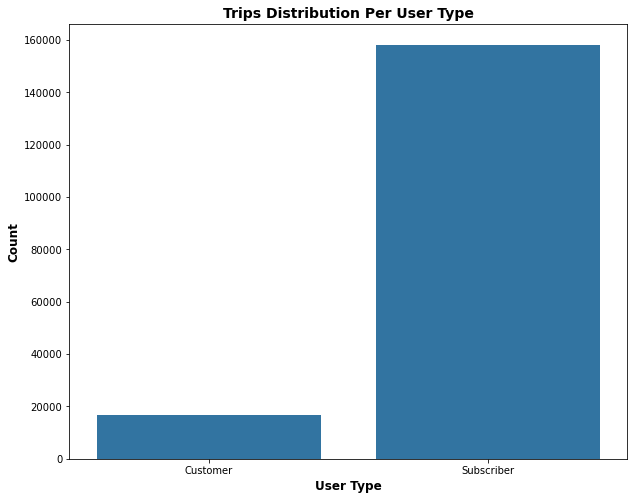

In [36]:
hist_chart(df_clean,'user_type')
plt.title('trips distribution per user type'.title(), fontsize= 14, weight = 'bold');

> Most of the Riders are Subscribers and way higher than the Customers



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Peak usage of bikes are in working days
- Peak usage of bikes are in working hours 
- There are more male riders than female riders
- Most of the riders are Subscribers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- I didn't know I had the data of Only February except after exploring visually and that means I didn't need to make a month column after all.
- Age Range of 25 till 50 is the Bulck usage, I actually didn't need to change my data at that point.
> Correction: I changed my data down in the graph "How Trip Distribution Vary by Gender" to make the box plot better visually.

## Bivariate Exploration


In [37]:
df2 = df_clean.copy()

>Creating A Function to create Histograms

In [38]:
def box_plot(df,col1,col2):
    """
    this function is for drawing a box plot to reduce repetitive code.
    """
    base_color = sb.color_palette()[0]
    sb.boxplot(data=df, x= col1, y=col2, color=base_color);
    plt.xlabel(f'{col1}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel(f'{col2}'.title().replace('_',' '), fontsize= 12, weight = 'bold');

### How Trip Distribution Vary by Gender

df2 = df.query('duration_min <= 65')

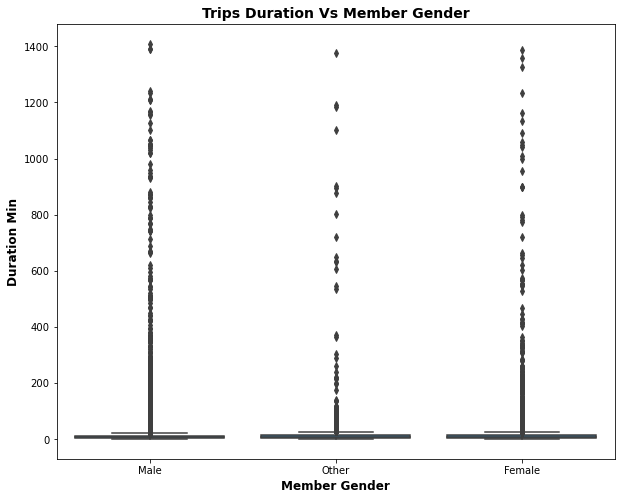

In [39]:
box_plot(df2,'member_gender','duration_min')
plt.title('Trips Duration VS member Gender'.title(), fontsize= 14, weight = 'bold');

Based on The `Trip duration Count` above let us remove the Trips less than 50 min

In [40]:
df2 = df2.query('duration_min <= 50')

Replotting the Graph

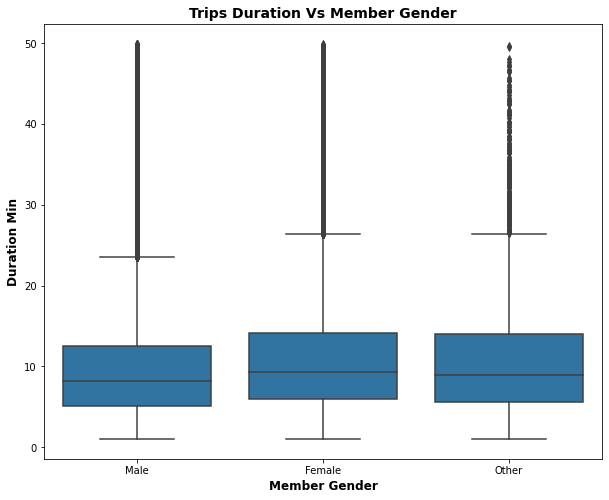

In [41]:
box_plot(df2,'member_gender','duration_min')
plt.title('Trips Duration VS member Gender'.title(), fontsize= 14, weight = 'bold');

>There is no big difference here but anyway males do shorter trips based on that graph

### Trip Duration based on User Type

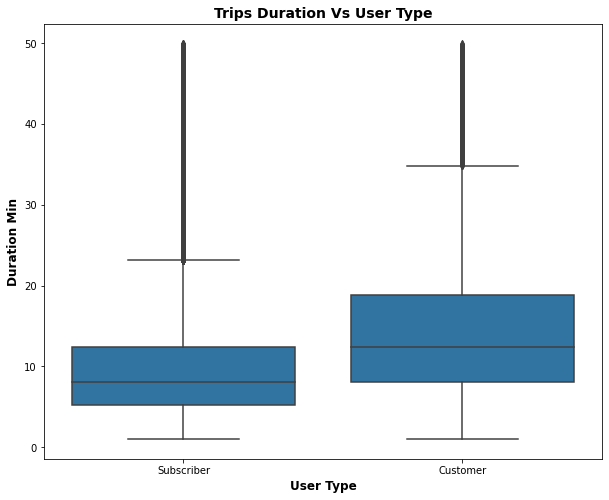

In [42]:
box_plot(df2,'user_type','duration_min')
plt.title('trips duration VS user type'.title(), fontsize= 14, weight = 'bold');

> Customers normally have a bigger duration trip duration than subscribers

### Average trip durations during weekdays 

> Creating Function of Bar Chart to avoid Repettive Work

In [43]:
def bar_chart(df,col1,col2):
    """
    this function is for drawing a bar chart to reduce repetitive code.
    """
    
    
    base_color = sb.color_palette()[0]
    sb.barplot(data=df2, x=col1, y=col2, color=base_color);
    plt.xlabel(f'{col1}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel(f'{col2}'.title().replace('_',' '), fontsize= 12, weight = 'bold');

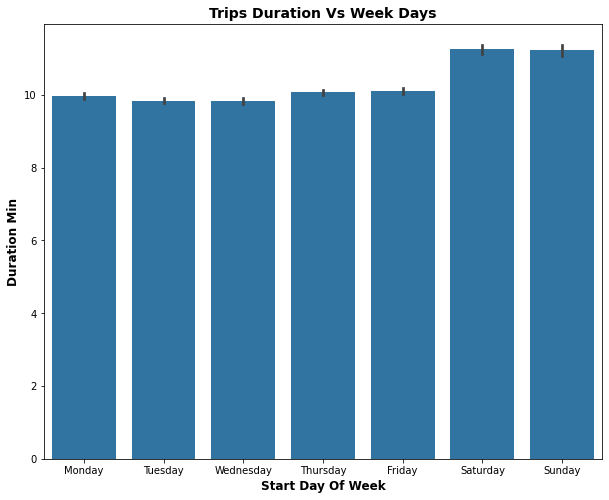

In [44]:
bar_chart(df2,'start_day_of_week','duration_min')
plt.title('trips duration VS Week days'.title(), fontsize= 14, weight = 'bold');

> This seems logical that the duration of trips in work days are lower than weekend holidays, Logical because on weekends people my take bikes as some kind of a sport or just a casual rides while working days they mostly cycle from home to work and vice versa as demonstrated in the Graph above of `Trip distribution over day hours`

### Weekly Usage verses the User Types

> Creating a Histogram Function to avoid Repitition

In [45]:
def bi_hist(df,col1,col2):
    """
    this function is for drawing a hist chart for bivariate analysis to reduce repetitive code.
    """
    sb.countplot(data=df2, x=col1, hue=col2);
    plt.xlabel(f'{col1}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel('Count', fontsize= 12, weight = 'bold');

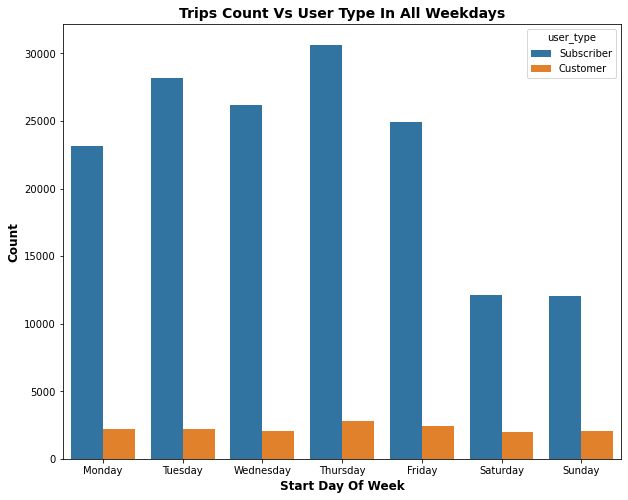

In [46]:
bi_hist(df2,'start_day_of_week','user_type')
plt.title('Trips Count VS User Type in all weekdays'.title(), fontsize= 14, weight = 'bold');

> I was Expecting the Customer user Type would be more on the weekends than the working days, however the statics shows that there was nearly no change on the customer user type level. 

### Daily Usage of Different user Types

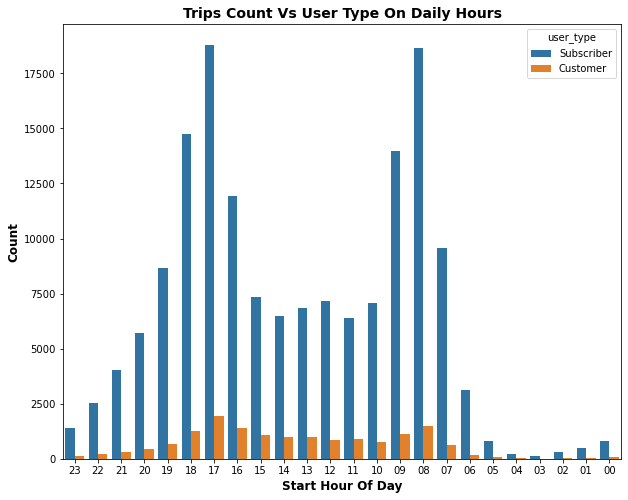

In [47]:
bi_hist(df2,'start_hour_of_day','user_type')
plt.title('Trips count VS User type on daily hours'.title(), fontsize= 14, weight = 'bold');

> Subscribers Have Really high number of trips against the Customer user type

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Customers normally have a bigger duration trip duration than subscribers
- The Duration of Trips in working days are smaller than weekends
- Subscribers Have Really high number of trips against the Customer user type

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- yes actually I was Expecting the Customer user Type would be more on the weekends than the working days, however the statics shows that there was nearly no change on the customer user type level.

## Multivariate Exploration


In [48]:
df3 = df2.copy()

### Average Trip duration in Weekdays for Different user Types

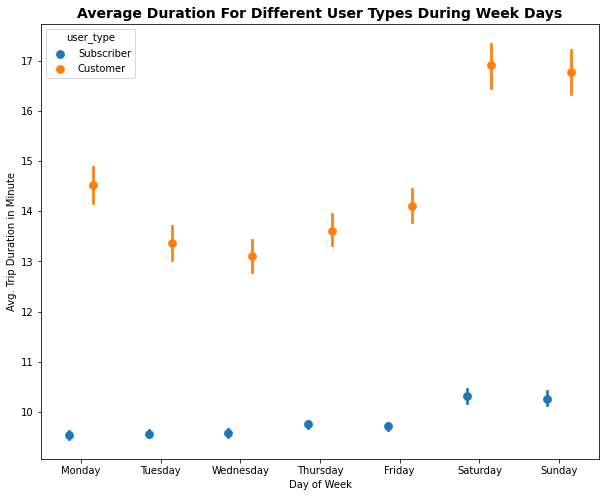

In [49]:
sb.pointplot(data=df3, x='start_day_of_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average duration for different user types during week days'.title(), fontsize= 14, weight = 'bold');

> Nothing New really however its a better Graph that groups multiple of conclusions
>- Subscribers tend to have shorter trip duration than customers
>- They both increase a little in weekend holidays

### Trip Duration for Different user Types and Genders

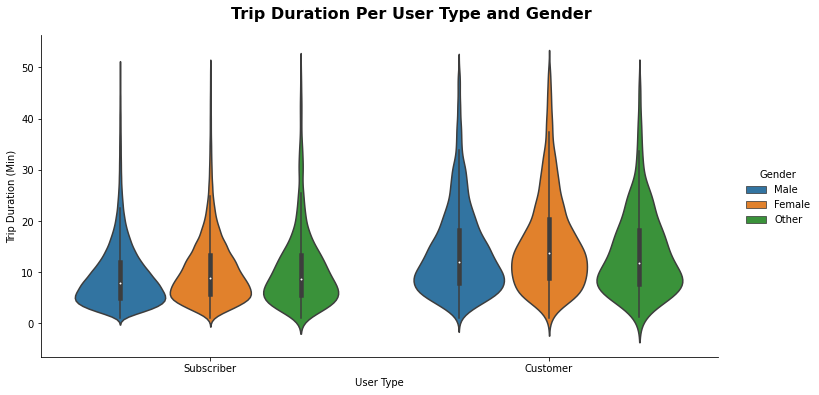

In [50]:
graph = sb.catplot(data=df3, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Trip Duration Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> Females take longer Time duration than males and others weather in both user types

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Bike Riders mostly use them to go to work or near places and looking at all the graphs above Relevant to the hourly distribution and the week day distribution support that.
- All Genders use Bikes equally 
- Trip count were so much more in the middle 30s than in 20s and I believe thats because of the higher awarness and maturity of older people may be if we planned to rise some awarness for the 20s we can improve their behaviors towards bike usage and therfore minimizing the gap.

### Were there any interesting or surprising interactions between features?

- Women Take a bit longer time in their trips than males and that can be because of their stamina and strength and consequently offers can be made for the customer females to increase the subscription level
- Customer User types take the same wave as subscribers in terms of daily hour distribution and consequently this means that customers also use them to go to work, May be there is a way to make them subscribe with a relevant offer of subscribtion, to be honset I was expecting that the level of customer user type would increase in weakends because they don't need bikes frequently however the usage is obviously the same as subscribers and thats a gap we need to tackle to increase the subscribers

In [52]:
df3.to_csv("cleaned_fordgobike.csv")